<a href="https://colab.research.google.com/github/ces0157/AI_class_project/blob/Sarah/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#all nesseccary import statements
from datasets import load_dataset
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Dataset

In [24]:
#load the dataset and split into testing and training
dataset = load_dataset("yelp_review_full")
dp_train = dataset['train'].to_pandas()
dp_test = dataset['test'].to_pandas()

In [25]:
dp_train

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...
...,...,...
649995,4,I had a sprinkler that was gushing... pipe bro...
649996,0,Phone calls always go to voicemail and message...
649997,0,Looks like all of the good reviews have gone t...
649998,4,I was able to once again rely on Yelp to provi...


# Functions

In [26]:
# Preprocess the text by first converting to lowercase, removing punctuation, and removing stop words.
# Then split into tokens and lemmatize each token, converting them to their root forms.
# Returns list of preprocessed tokens
def custom_tokenizer(text):
    # Create the word lemmatizer object
    wnl = WordNetLemmatizer()
    
    # Convert to lowercase, remove punctuation, and remove stop words
    text = ' '.join([word for word in text.split() if word not in (stop_words)])
    text = text.lower()
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    
    # Split text into individual tokens and lemmatize each token
    tokens = text.split()
    tokens = [wnl.lemmatize(token) for token in tokens]
    
    return tokens

In [27]:
# Creates a Tfidf (term frequency inverse document frequency) Vectorizer from the training data, converting reviews into a vector which stores
# terms along with the importance of each term.
# Returns the created vector
def create_vectorizer(train_df, column_text):
    # Extract all reviews
    sentences = train_df[column_text].values
    
    # Create Tfidf vectorizer that will store vocabulary along with importance of each word
    vectorizer = TfidfVectorizer(min_df=0.001, ngram_range=(1, 2), tokenizer=custom_tokenizer) 

    # fit the vocabulary to the text data
    vectorizer.fit(sentences)

    return vectorizer

In [28]:
# Passes in dataframe column, converts it a numpy array
# and performs the bag of word algorithm on it using vocab from training data.
# Returns a sparse matrix
def create_bag_words(df, vectorizer, column_text):
    # Extract all reviews
    sentences = df[column_text].values

    # create the bag-of-words model using previously-created vectorizer
    X = vectorizer.transform(sentences)

    return X

# Train Data

In [29]:
# Extract train labels
y_train = dp_train["label"].values

In [30]:
# Create list of stop words and preprocess each word
stop_words = list(set(stopwords.words('english')))
stop_words = [re.sub(r'[^A-Za-z0-9\s]+', '', word).lower() for word in stop_words]  # take commas out of stop words so they match preprocessed data

In [31]:
# create vectorizer consisting of vocab from training data
vectorizer = create_vectorizer(dp_train, "text")
print(vectorizer.vocabulary_.keys())
print(f'Vocab length: {len(vectorizer.vocabulary_.keys())}')

# Creates a set of new features modified to be a bag of words
X_fetaures_train = create_bag_words(dp_train, vectorizer, "text")
print(X_fetaures_train.shape)

C:\Users\bingh\OneDrive\Documents\School\Spring24\5600\AI_class_project\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


dict_keys(['dr', 'offer', 'everything', 'look', 'general', 'he', 'nice', 'easy', 'talk', 'without', 'always', 'time', 'seeing', 'patient', 'hospital', 'parent', 'explained', 'important', 'case', 'something', 'happens', 'need', 'surgery', 'get', 'see', 'first', 'really', 'im', 'sitting', 'trying', 'think', 'complaint', 'him', 'really need', 'im really', 'unfortunately', 'frustration', 'repeat', 'experience', 'ive', 'many', 'doctor', 'nyc', 'good', 'terrible', 'staff', 'seems', 'simply', 'never', 'answer', 'phone', 'usually', 'take', '2', 'hour', 'repeated', 'calling', 'want', 'deal', 'it', 'run', 'problem', 'dont', 'office', 'worker', 'medical', 'isnt', 'anyone', 'answering', 'work', 'regret', 'feel', 'give', 'star', 'experience ive', 'ive many', 'answer phone', '2 hour', 'time want', 'dont get', 'get it', '2 star', 'going', '10', 'year', 'one', '1st', 'started', 'great', 'big', 'picture', 'former', 'found', 'option', 'understanding', 'doesnt', 'judge', 'asks', 'right', 'question', 'tho

In [32]:
# Preforms Logistic Regression on the dataset
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_fetaures_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Training on the prediction
predict_train = lgr.predict(X_fetaures_train)
print(classification_report(predict_train, y_train))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    137077
           1       0.57      0.59      0.58    125043
           2       0.55      0.57      0.56    124552
           3       0.55      0.56      0.55    128278
           4       0.73      0.70      0.72    135050

    accuracy                           0.64    650000
   macro avg       0.64      0.63      0.63    650000
weighted avg       0.64      0.64      0.64    650000


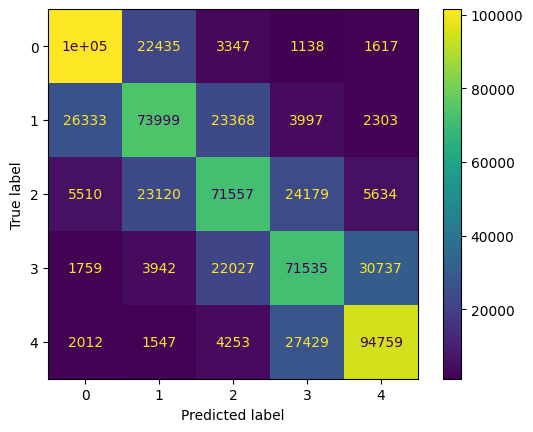

In [34]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_train, predict_train)
ConfusionMatrixDisplay(cm).plot()

# Test Data

In [35]:
# Extract all test labels
y_test = dp_test["label"].values

In [36]:
# Creates a set of new features modified to be a bag of words using same training vectorizer (don't have to reformat testing!)
X_features_test = create_bag_words(dp_test, vectorizer, "text")

In [37]:
# Gets label predictions from test data and printing results
predict_test = lgr.predict(X_features_test)
print(classification_report(predict_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     10578
           1       0.53      0.55      0.54      9603
           2       0.52      0.54      0.53      9543
           3       0.52      0.53      0.52      9896
           4       0.71      0.68      0.69     10380

    accuracy                           0.61     50000
   macro avg       0.61      0.60      0.61     50000
weighted avg       0.61      0.61      0.61     50000


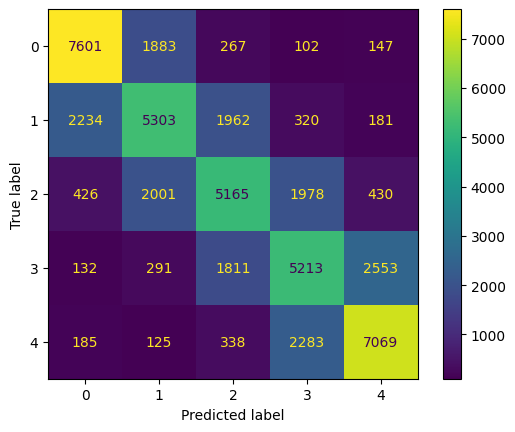

In [38]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(cm).plot()